# Data Structure Understanding



Luna 16 dataset consists of:
 - CT scan images (.mhd and .raw files) - medical imaging format
 - annotations.csv - contains nodule coordinates and diameters
 - candidates.csv - contains candidate nodules (both true and false positives)
 - Usually 10 subsets (subset0-subset9) for cross-validation


Installing SimpleITK (important for later)

In [1]:
!pip install SimpleITK

Importing all the important libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

annotations = pd.read_csv("/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/annotations.csv")

annotations.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [4]:
candidates = pd.read_csv("/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/candidates.csv")

candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


  - annotations.csv: columns include seriesuid, coordX, coordY, coordZ, diameter_mm
  - candidates.csv: columns include seriesuid, coordX, coordY, coordZ, class (0=non-nodule, 1=nodule)



# Inspecting Annotations Data

We have already loaded annotations.csv and candidated.csv, now we are going to inspect some key properties of those parts of our dataset.

In [5]:
# --- Data Overview ---
print("Annotations Shape:", annotations.shape)
print("Candidates Shape:", candidates.shape)

print("\nMissing values (annotations):\n", annotations.isna().sum())
print("\nMissing values (candidates):\n", candidates.isna().sum())

# Show first and last rows
display(annotations.head(), annotations.tail())
display(candidates.head(), candidates.tail())


Annotations Shape: (1186, 5)
Candidates Shape: (551065, 5)

Missing values (annotations):
 seriesuid      0
coordX         0
coordY         0
coordZ         0
diameter_mm    0
dtype: int64

Missing values (candidates):
 seriesuid    0
coordX       0
coordY       0
coordZ       0
class        0
dtype: int64


,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


,seriesuid,coordX,coordY,coordZ,diameter_mm
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203
1185,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-21.958478,33.486096,-155.292026,23.802913


,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-56.08,-67.85,-311.92,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,53.21,-244.41,-245.17,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.66,-121.80,-286.62,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-33.66,-72.75,-308.41,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-32.25,-85.36,-362.51,0


,seriesuid,coordX,coordY,coordZ,class
551060,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-55.66,37.24,-110.42,0
551061,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,68.40,70.18,-109.72,0
551062,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-82.29,-27.94,-106.92,0
551063,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,38.26,83.50,-102.71,0
551064,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-63.37,-9.71,-111.12,0


In [6]:
# 1. Count unique patients/scans (seriesuid)
unique_patients = annotations["seriesuid"].nunique()
print("Unique patients/scans:", unique_patients)

# 2. Count total annotated nodules
total_nodules = len(annotations)
print("Total annotated nodules:", total_nodules)

# 3. Count candidates (positive vs negative)
candidate_counts = candidates["class"].value_counts()
print("\nCandidate counts:")
print(candidate_counts)

# 4. Calculate class distribution (%)
candidate_distribution = candidates["class"].value_counts(normalize=True) * 100
print("\nCandidate class distribution (%):")
print(candidate_distribution)

Unique patients/scans: 601
Total annotated nodules: 1186

Candidate counts:
class
0    549714
1      1351
Name: count, dtype: int64

Candidate class distribution (%):
class
0    99.754838
1     0.245162
Name: proportion, dtype: float64


The candidate distribution in candidates.csv is highly imbalanced, based on the computed values. This imbalance is expected in the LUNA16 dataset, where true nodules represent only a small fraction of all detected candidates. Such skewed class proportions can bias machine learning models toward predicting the majority class, leading to deceptively high accuracy but poor sensitivity to actual nodules. To address this, it is recommended to use stratified sampling, class-weighted loss functions, or data augmentation/oversampling strategies when training models. Additionally, evaluation should rely on metrics suited for imbalanced datasets—such as precision, recall, F1-score, ROC-AUC, and PR-AUC—rather than accuracy alone.

# Nodule Characteristics Analysis

1. Diameter distribution

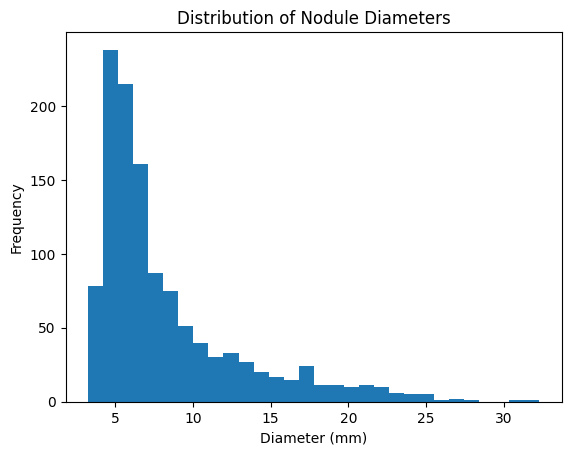

Diameter Statistics:
Mean: 8.306527315553964
Median: 6.433600479000001
Std Dev: 4.762032807179361
Min: 3.253443196
Max: 32.27003025

Diameter Ranges:
Small (<10mm): 905
Medium (10–20mm): 231
Large (>20mm): 50

Outlier Detection:
Lower bound: -1.7765103249999976
Upper bound: 16.579988526999998
Number of outliers: 103


In [7]:
# -----------------------------------------
# 1. Plot histogram of nodule diameters
# -----------------------------------------
plt.hist(annotations["diameter_mm"], bins=30)
plt.xlabel("Diameter (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Nodule Diameters")
plt.show()

# -----------------------------------------
# 2. Calculate statistics: mean, median, std, min, max
# -----------------------------------------
mean_d = annotations["diameter_mm"].mean()
median_d = annotations["diameter_mm"].median()
std_d = annotations["diameter_mm"].std()
min_d = annotations["diameter_mm"].min()
max_d = annotations["diameter_mm"].max()

print("Diameter Statistics:")
print("Mean:", mean_d)
print("Median:", median_d)
print("Std Dev:", std_d)
print("Min:", min_d)
print("Max:", max_d)

# -----------------------------------------
# 3. Identify diameter ranges
#    small (<10mm), medium (10–20mm), large (>20mm)
# -----------------------------------------
small = (annotations["diameter_mm"] < 10).sum()
medium = ((annotations["diameter_mm"] >= 10) & (annotations["diameter_mm"] <= 20)).sum()
large = (annotations["diameter_mm"] > 20).sum()

print("\nDiameter Ranges:")
print("Small (<10mm):", small)
print("Medium (10–20mm):", medium)
print("Large (>20mm):", large)

# -----------------------------------------
# 4. Check for outliers using IQR
# -----------------------------------------
Q1 = annotations["diameter_mm"].quantile(0.25)
Q3 = annotations["diameter_mm"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = annotations[(annotations["diameter_mm"] < lower_bound) |
                       (annotations["diameter_mm"] > upper_bound)]

print("\nOutlier Detection:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers:", len(outliers))


2. Spatial distribution

2.1. X, Y, Z distributions

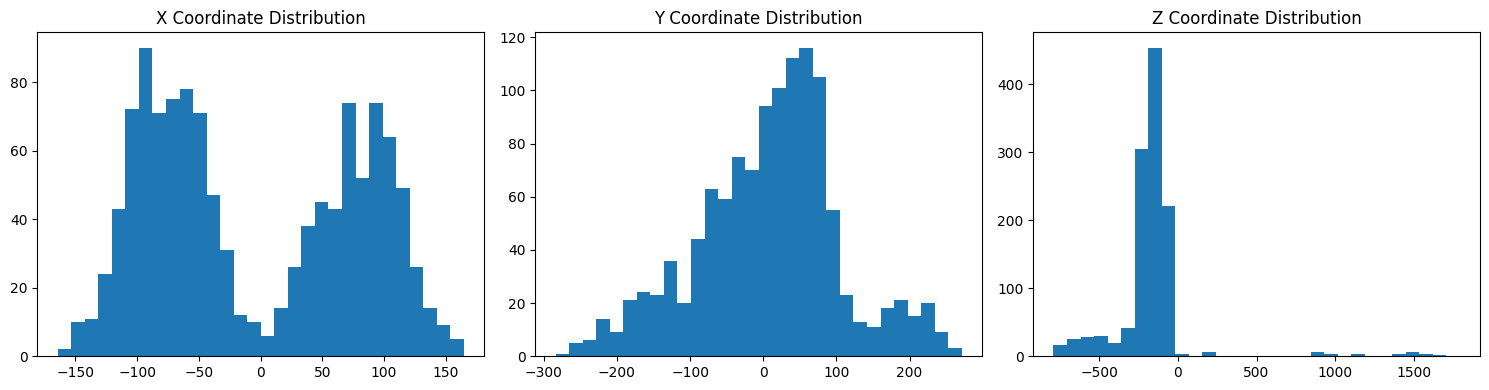

In [8]:
# Plot coordinate distributions
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].hist(annotations["coordX"], bins=30)
axes[0].set_title("X Coordinate Distribution")

axes[1].hist(annotations["coordY"], bins=30)
axes[1].set_title("Y Coordinate Distribution")

axes[2].hist(annotations["coordZ"], bins=30)
axes[2].set_title("Z Coordinate Distribution")

plt.tight_layout()
plt.show()


2.2. Check if nodules cluster in specific regions

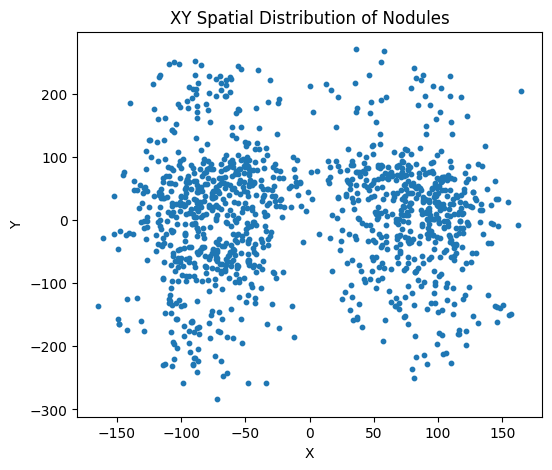

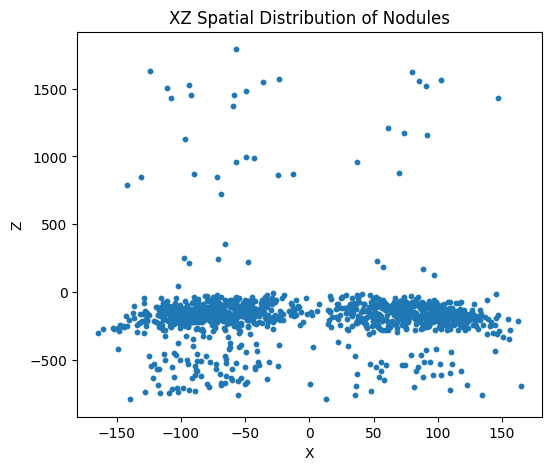

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(annotations["coordX"], annotations["coordY"], s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("XY Spatial Distribution of Nodules")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(annotations["coordX"], annotations["coordZ"], s=10)
plt.xlabel("X")
plt.ylabel("Z")
plt.title("XZ Spatial Distribution of Nodules")
plt.show()


2.3. 3D **visualization**

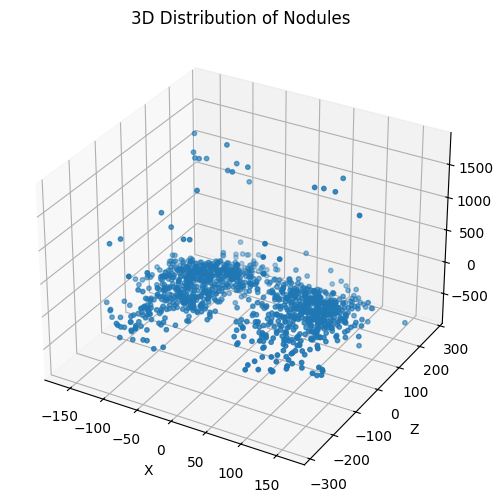

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    annotations["coordX"],
    annotations["coordY"],
    annotations["coordZ"],
    s=10
)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylabel("Z")
ax.set_title("3D Distribution of Nodules")

plt.show()


3. Per-Scan Statistics

In [11]:
#Count nodules per scan
nodules_per_scan = annotations.groupby("seriesuid").size()
print(nodules_per_scan.head())

seriesuid
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860    2
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405    4
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275    1
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249    1
dtype: int64


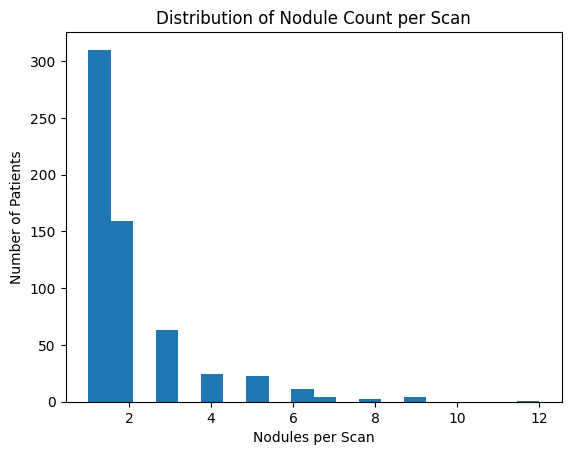

In [12]:
#Plot distribution of nodules per scan
plt.hist(nodules_per_scan, bins=20)
plt.xlabel("Nodules per Scan")
plt.ylabel("Number of Patients")
plt.title("Distribution of Nodule Count per Scan")
plt.show()


In [13]:
#Identify scans with the most nodules
top_scans = nodules_per_scan.sort_values(ascending=False).head(10)
print("Scans with the most nodules:")
print(top_scans)


Scans with the most nodules:
seriesuid
1.3.6.1.4.1.14519.5.2.1.6279.6001.176030616406569931557298712518    12
1.3.6.1.4.1.14519.5.2.1.6279.6001.195557219224169985110295082004     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.219428004988664846407984058588     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.202187810895588720702176009630     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.328789598898469177563438457842     9
1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437     8
1.3.6.1.4.1.14519.5.2.1.6279.6001.239358021703233250639913775427     8
1.3.6.1.4.1.14519.5.2.1.6279.6001.280072876841890439628529365478     7
1.3.6.1.4.1.14519.5.2.1.6279.6001.309955999522338651429118207446     7
1.3.6.1.4.1.14519.5.2.1.6279.6001.169128136262002764211589185953     7
dtype: int64


# CT Scan Image Analysis

In [14]:
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

merged_folder = "/content/drive/MyDrive/MLST_Lung_Cancer_Detection_And_Classification/LUNA16_merged"

# Get all .mhd files
mhd_files = sorted([f for f in os.listdir(merged_folder) if f.endswith(".mhd")])
#print("Found scans:", mhd_files)

# Load all scans into a dictionary
dataset = {}
for f in mhd_files:
    file_path = os.path.join(merged_folder, f)
    image = sitk.ReadImage(file_path)
    array = sitk.GetArrayFromImage(image)
    dataset[f] = array
    #print(f"Loaded {f}, shape: {array.shape}")

# --- Optional: interactive visualization ---
def show_slice(scan_name, slice_idx):
    array = dataset[scan_name]
    plt.imshow(array[slice_idx], cmap='gray')
    plt.title(f"{scan_name} — Slice {slice_idx}")
    plt.axis('off')
    plt.show()

# Widgets for browsing
scan_dropdown = widgets.Dropdown(options=mhd_files, description='Scan:')
slice_slider = widgets.IntSlider(min=0, max=max(dataset[mhd_files[0]].shape[0]-1, 0), step=1, description='Slice:')

def update_slider(*args):
    slice_slider.max = dataset[scan_dropdown.value].shape[0] - 1

scan_dropdown.observe(update_slider, 'value')

widgets.interact(show_slice, scan_name=scan_dropdown, slice_idx=slice_slider)


interactive(children=(Dropdown(description='Scan:', options=('1.3.6.1.4.1.14519.5.2.1.6279.6001.10022528722236…

<function __main__.show_slice(scan_name, slice_idx)>

In [15]:
# Check slice count range across all scans
slice_counts = {name: arr.shape[0] for name, arr in dataset.items()}

print("Slice count per scan:")
for name, count in slice_counts.items():
    print(f"{name}: {count}")

min_slices = min(slice_counts.values())
max_slices = max(slice_counts.values())

print(f"\nMinimum number of slices: {min_slices}")
print(f"Maximum number of slices: {max_slices}")


Slice count per scan:
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd: 140
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053.mhd: 120
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd: 113
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd: 118
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd: 126
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd: 128
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd: 123
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd: 133
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086.mhd: 128
1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.mhd: 112
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249.mhd: 143
1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219.mhd: 110
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217.mhd: 112
1.3.6.1.4.1.1451

In [16]:
#Check image dimensions
print("\nImage dimensions per scan (H x W):")
for name, arr in dataset.items():
    h, w = arr.shape[1], arr.shape[2]
    print(f"{name}: {h} x {w}")



Image dimensions per scan (H x W):
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd: 165 x 165
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053.mhd: 180 x 180
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd: 160 x 160
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd: 170 x 170
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd: 170 x 170
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd: 142 x 142
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd: 125 x 125
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd: 180 x 180
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086.mhd: 201 x 201
1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.mhd: 160 x 160
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249.mhd: 220 x 220
1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219.mhd: 220 x 220
1.3.

In [17]:
import SimpleITK as sitk
import os

print("\nVoxel spacing metadata (x, y, z) per scan:")

spacing_info = {}

for f in mhd_files:
    file_path = os.path.join(merged_folder, f)

    reader = sitk.ImageFileReader()
    reader.SetFileName(file_path)
    reader.ReadImageInformation()     # reads ONLY header, not image data

    spacing = reader.GetSpacing()     # same output, much faster
    spacing_info[f] = spacing

    print(f"{f}: spacing = {spacing}")




Voxel spacing metadata (x, y, z) per scan:
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086.mhd: spacing = (2.0, 2.0, 2.5)
1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797.mhd: spacing = (2.0, 2.0, 2

In [18]:
#Examine pixel value (HU) distributions per scan
import numpy as np

print("\nHU statistics per scan:")
hu_stats = {}

for name, arr in dataset.items():
    hu_min = float(arr.min())
    hu_max = float(arr.max())
    hu_mean = float(arr.mean())
    hu_stats[name] = (hu_min, hu_max, hu_mean)
    print(f"{name}: min={hu_min:.1f}, max={hu_max:.1f}, mean={hu_mean:.1f}")



HU statistics per scan:
1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd: min=-1024.0, max=2254.0, mean=-368.7
1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053.mhd: min=-3024.0, max=1702.0, mean=-965.9
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd: min=-1024.0, max=1537.0, mean=-396.3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd: min=-3024.0, max=3072.0, mean=-916.5
1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543.mhd: min=-3024.0, max=3071.0, mean=-961.0
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd: min=-1000.0, max=3000.0, mean=-512.3
1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866.mhd: min=-1024.0, max=1717.0, mean=-426.8
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd: min=-2048.0, max=3071.0, mean=-745.5
1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086.mhd: min=-3024.0, max=1697.0, mean=-1125.8
1.3.6.1.4.1

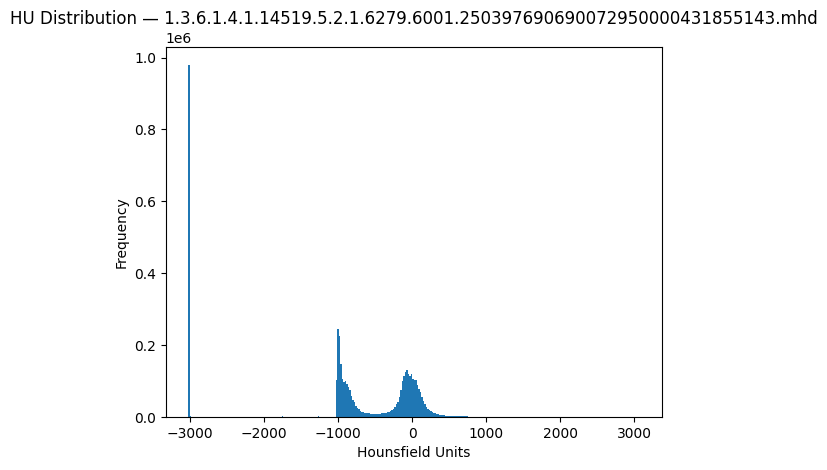

In [19]:
#Plot HU histogram for one representative scan

# Pick a representative scan (middle one)
example_scan = mhd_files[len(mhd_files)//2]
example_array = dataset[example_scan].flatten()

plt.hist(example_array, bins=300)
plt.title(f"HU Distribution — {example_scan}")
plt.xlabel("Hounsfield Units")
plt.ylabel("Frequency")
plt.show()


A Hounsfield Unit (HU) distribution is simply a histogram showing how many voxels in a CT scan have a given HU value.

The HU scale is defined like this:

Tissue / Material	HU Value
Air	–1000 HU

Lung tissue	–950 to –500 HU

Fat	–200 to –100 HU

Water	0 HU

Soft tissue	20 to 80 HU

Blood	30 to 45 HU

Bone	+300 to +3000 HU


In [20]:
#Summary: Count slices, spacing, HU stats in one table
summary = []

for name in mhd_files:
    arr = dataset[name]
    slices = arr.shape[0]

    # spacing
    spacing = spacing_info[name]

    # HU stats
    hu_min, hu_max, hu_mean = hu_stats[name]

    summary.append([name, slices, spacing, hu_min, hu_max, hu_mean])

import pandas as pd
summary_df = pd.DataFrame(summary, columns=["Scan", "Slices", "Spacing (mm)", "HU Min", "HU Max", "HU Mean"])
summary_df


,Scan,Slices,Spacing (mm),HU Min,HU Max,HU Mean
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,140,"(2.0, 2.0, 2.5)",-1024.0,2254.0,-368.715800
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...,120,"(2.0, 2.0, 2.5)",-3024.0,1702.0,-965.862921
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,113,"(2.0, 2.0, 2.5)",-1024.0,1537.0,-396.349897
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...,118,"(2.0, 2.0, 2.5)",-3024.0,3072.0,-916.479187
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...,126,"(2.0, 2.0, 2.5)",-3024.0,3071.0,-960.974557
...,...,...,...,...,...,...
809,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,112,"(2.0, 2.0, 2.5)",-3024.0,1537.0,-855.744631
810,1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713...,113,"(2.0, 2.0, 2.5)",-1024.0,1897.0,-541.492855
811,1.3.6.1.4.1.14519.5.2.1.6279.6001.986011151772...,119,"(2.0, 2.0, 2.5)",-2048.0,5904.0,-820.220107
812,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,146,"(2.0, 2.0, 2.5)",-3024.0,3071.0,-1031.804957


# Slice-level analysis

Average % of informative slices: 1.05%
Median % of informative slices: 0.79%
Scans with at least 1 nodule: 555


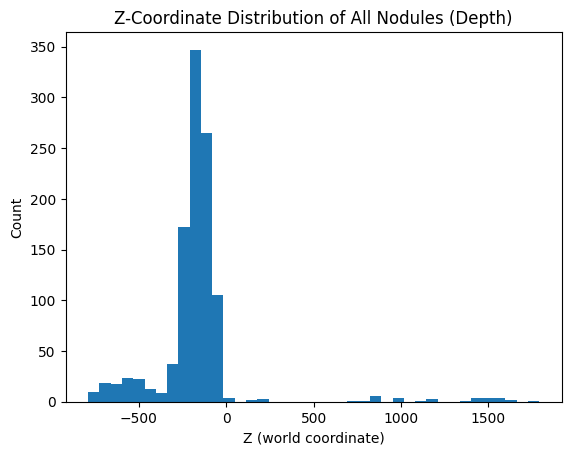

In [22]:
import pandas as pd
import numpy as np
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt


# Dictionary to store slice-level stats
slice_stats = {}

for scan_name in dataset.keys():

    # Convert "scan.mhd" → "scan"
    scan_uid = os.path.splitext(scan_name)[0]

    # Load metadata ONLY (fast)
    file_path = os.path.join(merged_folder, scan_name)
    reader = sitk.ImageFileReader()
    reader.SetFileName(file_path)
    reader.ReadImageInformation()

    origin = np.array(reader.GetOrigin())[::-1]      # Z,Y,X order
    spacing = np.array(reader.GetSpacing())[::-1]    # Z,Y,X order
    num_slices = reader.GetSize()[2]                 # slices = Z dimension

    # Array from dataset (you already loaded these)
    arr = dataset[scan_name]

    # Filter annotations for this scan
    scan_ann = annotations[annotations["seriesuid"] == scan_uid]

    # If no nodules → empty scan stats
    if len(scan_ann) == 0:
        slice_stats[scan_name] = {
            "num_slices": num_slices,
            "nodule_slices": 0,
            "percent_informative": 0,
            "slice_indices": [],
            "z_coords": []
        }
        continue

    # Map Z world coordinate to slice index
    z_world = scan_ann["coordZ"].values
    z_voxel = ((z_world - origin[0]) / spacing[0]).astype(int)

    # Keep valid slices
    z_voxel = [z for z in z_voxel if 0 <= z < num_slices]
    unique_slices = sorted(set(z_voxel))

    informative_ratio = len(unique_slices) / num_slices * 100

    slice_stats[scan_name] = {
        "num_slices": num_slices,
        "nodule_slices": len(unique_slices),
        "percent_informative": informative_ratio,
        "slice_indices": unique_slices,
        "z_coords": z_world
    }

# ---- Summary stats across dataset ----
all_informative = [v["percent_informative"] for v in slice_stats.values()]
all_nodule_slices = [v["nodule_slices"] for v in slice_stats.values()]

print(f"Average % of informative slices: {np.mean(all_informative):.2f}%")
print(f"Median % of informative slices: {np.median(all_informative):.2f}%")
print(f"Scans with at least 1 nodule: {sum(np.array(all_nodule_slices) > 0)}")

# ---- Z-coordinate distribution ----
all_z = np.concatenate([v["z_coords"] for v in slice_stats.values() if len(v["z_coords"]) > 0])

plt.hist(all_z, bins=40)
plt.title("Z-Coordinate Distribution of All Nodules (Depth)")
plt.xlabel("Z (world coordinate)")
plt.ylabel("Count")
plt.show()



Example: List of slice numbers that contain nodules for all scans that contain them

In [27]:
for name, stats in slice_stats.items():
  stats["slice_indices"] = [int(x) for x in stats["slice_indices"]]
  if stats["slice_indices"]:   # non-empty list
        print(name, stats["slice_indices"])


1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd [56, 84]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208.mhd [63]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd [56, 92, 100, 106]
1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275.mhd [76]
1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249.mhd [121]
1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173137525888934217.mhd [41]
1.3.6.1.4.1.14519.5.2.1.6279.6001.105495028985881418176186711228.mhd [44]
1.3.6.1.4.1.14519.5.2.1.6279.6001.106164978370116976238911317774.mhd [63]
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949.mhd [44, 66]
1.3.6.1.4.1.14519.5.2.1.6279.6001.106630482085576298661469304872.mhd [69]
1.3.6.1.4.1.14519.5.2.1.6279.6001.106719103982792863757268101375.mhd [74]
1.3.6.1.4.1.14519.5.2.1.6279.6001.107109359065300889765026303943.mhd [30]
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306.mhd [32, 38, 43, 45, 46,

# Visualization Steps

We have already visualized the scans (check the first cell of CT scan image analysis) with a slider that allows us to see all the slices from one scan.

In our another available colab notebook, "zip_to_dataset" we have tried to represent the scans in 3D, unfourtunately, the resolution is too big for us to generate anything, but the code runs, so the code is still there to showcase our work.

In [ ]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers.default = "colab"

# Small random 3D array for testing
test_array = np.random.rand(50, 50, 50)

fig = go.Figure(data=go.Volume(
    x=np.arange(test_array.shape[2]).repeat(test_array.shape[1]*test_array.shape[0]),
    y=np.tile(np.arange(test_array.shape[1]).repeat(test_array.shape[0]), test_array.shape[2]),
    z=np.tile(np.arange(test_array.shape[0]), test_array.shape[1]*test_array.shape[2]),
    value=test_array.flatten(),
    opacity=0.1,
    surface_count=15,
    colorscale='Gray'
))

fig.show()
#3D too heavy to load, either we downsample more or use 2D slices for one scan which is showcased above